# Practice Activity: Polynomial Regression
Hanna Wierszok

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
# Code Here
!pip install palmerpenguins

In [2]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal
from palmerpenguins import load_penguins

In [3]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [4]:
penguins = penguins.dropna()

In [6]:
# Code Here
X = penguins[["species", "island", "bill_length_mm","flipper_length_mm","body_mass_g","sex","year"]]
y = penguins["bill_depth_mm"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

In [7]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

Multiple linear regression model (best)

In [8]:
lr_pipeline_1 = Pipeline(
  [("preprocessing", ct),
   ("elastic_net", ElasticNet())]
).set_output(transform="pandas")

param = {
    "elastic_net__alpha": np.arange(0.001, 0.01, 0.1),
    "elastic_net__l1_ratio": np.arange(.10, .20, .30)
    }

gscv = GridSearchCV(lr_pipeline_1, param, cv = 5, scoring='r2')

gscv.fit(X_train, y_train)
y_pred = gscv.predict(X_test)
mse1=np.sqrt(mean_squared_error(y_test, y_pred))
mse1

0.8359942902517726

KNN Model=3

In [9]:
lr_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", KNeighborsRegressor(n_neighbors=3))]
)

lr_pipeline_2.fit(X_train, y_train)
y_pred = lr_pipeline_2.predict(X_test)
mse2=np.sqrt(mean_squared_error(y_test, y_pred))
mse2

0.9405193881982019

KNN Model=10

In [10]:
lr_pipeline_3 = Pipeline(
  [("preprocessing", ct),
  ("knn_regression", KNeighborsRegressor(n_neighbors=10))]
)

lr_pipeline_3.fit(X_train, y_train)
y_pred = lr_pipeline_3.predict(X_test)
mse3=np.sqrt(mean_squared_error(y_test, y_pred))
mse3

0.8273602601043876

Decision tree model

In [11]:
lr_pipeline_4 = Pipeline(
  [("preprocessing", ct),
  ("Decision_tree", DecisionTreeRegressor(min_samples_leaf=5))]
)

lr_pipeline_4.fit(X_train, y_train)
y_pred = lr_pipeline_4.predict(X_test)
mse4=np.sqrt(mean_squared_error(y_test, y_pred))
mse4

1.0441347200200277

/usr/local/lib/python3.10/dist-packages/plotnine/geoms/geom_path.py:111: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


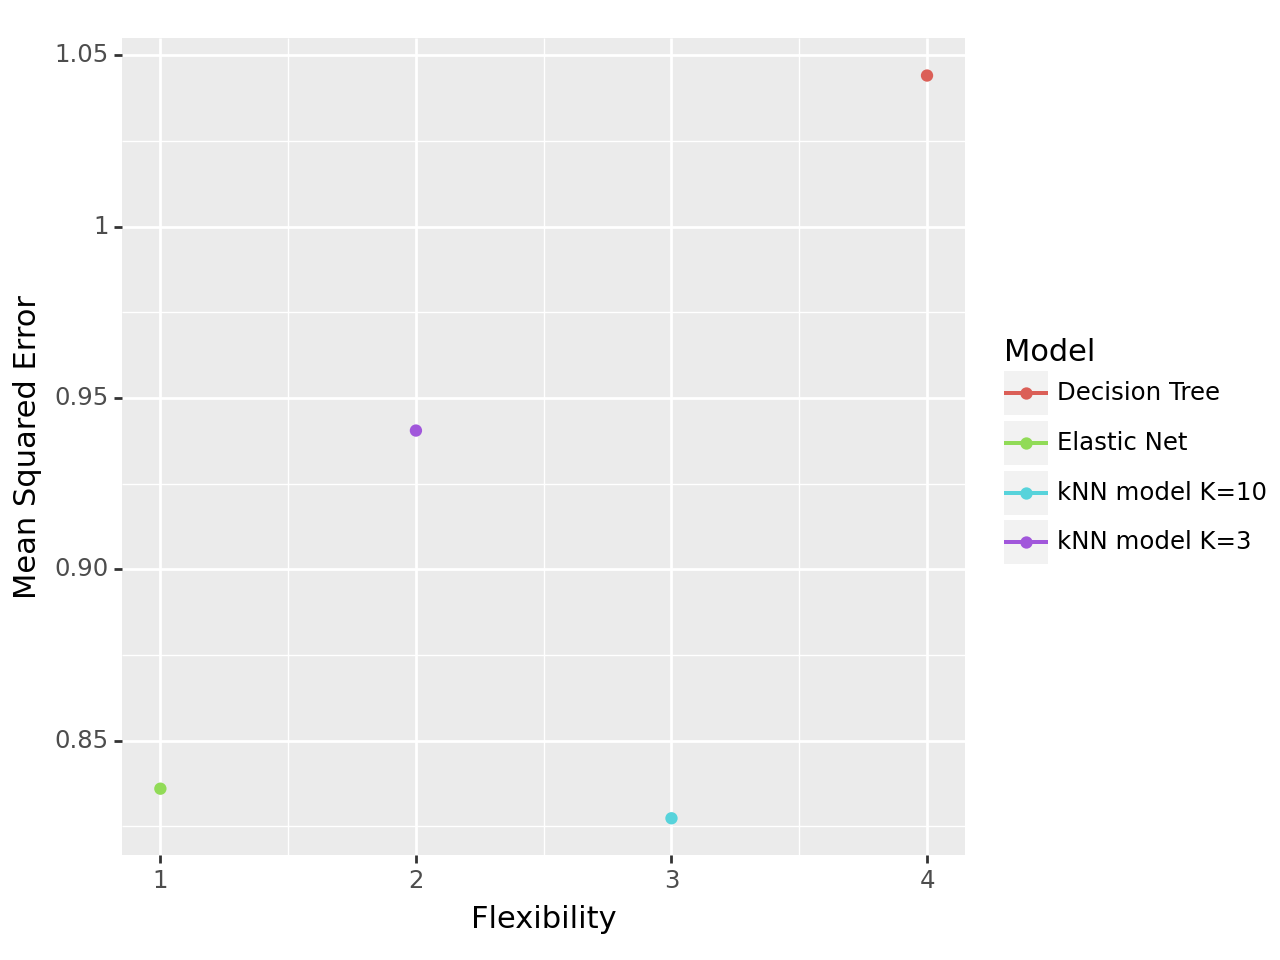

<Figure Size: (640 x 480)>

In [12]:
mse_flex_table = pd.DataFrame({"flexibility" :[1,2,3,4],
                     "mse_values" :[mse1, mse2, mse3,mse4],
                     "Model": ["Elastic Net","kNN model K=3","kNN model K=10", "Decision Tree"]
})

(ggplot(mse_flex_table ,
       aes(x="flexibility",
           y="mse_values",
           color="Model"))
+ geom_line()
+ geom_point()
+labs( x="Flexibility", y="Mean Squared Error")
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The kNN model with a K of 10 has the lowest mean square error (mse) among the four models, indicating that it is the best model, as can be seen from the plot.